# PART 1: DATA PREPROCESSING

# Data Preprocessing Tools
These are all the tools you will need when preprocessing your data for your future machine learning models. 

## Importing the libraries

`NumPy` will allow us to work with arrays. Machine Learning models will expect some arrays as inputs. 
`pandas` will allow us to create the matrix of features and the dependent variable vector. 

A library contains functions and classes with which you can perform some actions. 

In [ ]:
# We will always use these libraries
import numpy as np
import matplotlib.pyplot as plt # adding the dot before pyplot allows you to acess the different modules of the matplotlib library
import pandas as pd

## Importing the dataset

The first think we have to do is create a variable that will be the output of a certain function of pandas, and this certain function will read all the values of this dataset and will create a dataframe. 

`read_csv` comes from the pandas library. Since we are going to use a pandas function, the first thing we have to do is call the pandas library (pd). 

The next thing you have to do is create two new entities. The first one is a matrix of features and the second one is the dependent variable vector.

In any dataset with which you are going to train a ML model you have the same entities which are the features and the dependent variable vector. The features are the columns with which you are going to predict the dependent variable. Usually in a dataset the features will be the first few columns and the dependent variable usually in the last column of the dataset. So the entities we want to create is the matrix of features and seperately we want to create the dependent variable vector containing only the last column. 

x = matrix of features 
- in order to create x we need to take the first 3 columns. So what we are going to do is play with the indexes to create the indexes of these first three columns. 
    
`.iloc[row,col]` stands for locate indexes and therefore what this function will do is it will take the indexes of the columns we want to extract from the dataset. Not only the indexes of the columns, but also the indexes of the rows. The trick to take all the rows regardless of how many rows is to use a colon `:` because a colon in python means a range. When we specify a range without the lower bound or the upper bound that means in python that we are taking everything in the range, therefore here all the rows. Adding `.values` just means that we are taking all the values instead of having it remain in a data frame. 

Remember: a range in Python includes the lower bound but excludes the upper bound. Therefore here we are excluding this index minus one. 

In [ ]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values # takes all the columns except the last one (i.e., your features)
y = dataset.iloc[:, -1].values # takes only the last column 

In [ ]:
print(X)

In [ ]:
print(y)

Remember that the reason we had to create x and y is because the way we are going to build our future machine learning models expects exactly these two entities in their inputs. We will use some classes to build these models and these classes don't expect the dataset as a whole but these two seperate entities. 

## Taking care of missing data
Missing data can cause some errors when training your ML model, therefore you must handle them. 

Ways to handle missing data:
1. ignore those observations (delete them). Ths is useful if you have a large dataset and only a small percent of the data is missing. 
2. You can replace the missing value with the average of all the values in the column in which the data is missing. 

We will import that SimpleImputer class and then we will create an instance (an object) of the simple imputer class. This object will allow us to replace the missing salary with the average.  

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# ^ remember that this is just an object and at this point we haven't connected anything to our matrix of features. 
# the next step is to apply this imputer object onto the matrix of features. 

imputer.fit(X[:, 1:3]) # the fit method will connect this imputer to the matrix of features. I.e., it will look at the missing values in the salary column and it will compute the average of the salaries. 
X[:, 1:3] = imputer.transform(X[:, 1:3]) # it will replace the missing values with the mean

In [ ]:
print(X)

## Encoding categorical data

One hot encoding consists of turning this country column into three columns because there are three categories in this column. One hot encoding consits of creating binary vectors for each of the countries. This is a very useful method when preprocessing your data that contains categorical variables. Remember that to create an instance of a class, you need to call the class itself. 



### Encoding the Independent Variable

The first step is to create an object of the ColumnTransformer class and therefore we need a new variable which we will call `ct`. `remainder` = passthrough will allow us to keep the other columns of our dataset. 

It is very important to have `x` as a numpy array because this will be expected by the future machine learning models which we are going to build. 

The idea behind one hot encoding is that we not only turn our countries into numerical values but also there is not a numerical order thanks to these 0s and 1s. This will provide the best results for our future machine learning models. 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

### Encoding the Dependent Variable

This time we don't need a NumPy array so we can set the new y to be what is the result of this fit transform method. 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

## Splitting the dataset into the Training set and Test set

Each time you want to train a ML model, you have to create two seperate sets. One training set where you are going to train your ML model to understand the correlations inside your dataset and one test set which you are going to use to evaluate your machine learning models. The test set is new data on which the model wasn't trained. It is very important to do this in order to check that you are not overfitting. It is possible that the model performs so well on the training set that it does not perform well on our testing set. 

Rememeber that this function doesn't expect the function as a whole, it expects the matrix of features x and the dependent variable y. We are not going to split this dataset into a training and a test set of the same size, we need a lot of observations in the training set and a few in the test set. It is best to have 80% of observations in the training set and 20% in the test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

## Feature Scaling

We have to apply feature scaling after spliting the dataset into the training set and the test set. Feature scaling will get the mean and standard deviation of your feature. 

Why? We need to this to avoid some feaures from being dominated by other features in such a way that the dominated features are not even considered by the machine learnning model. You should also be aware that we wont have to apply feautre scaling to all the machine learning models, just for a few of them. For a lot of machine learning models we wont have to apply feature scaling even if we have features taking very different values. 

For now just know that this is a tool that will be applied from time to time to certain machine learning models, but not all the time. 

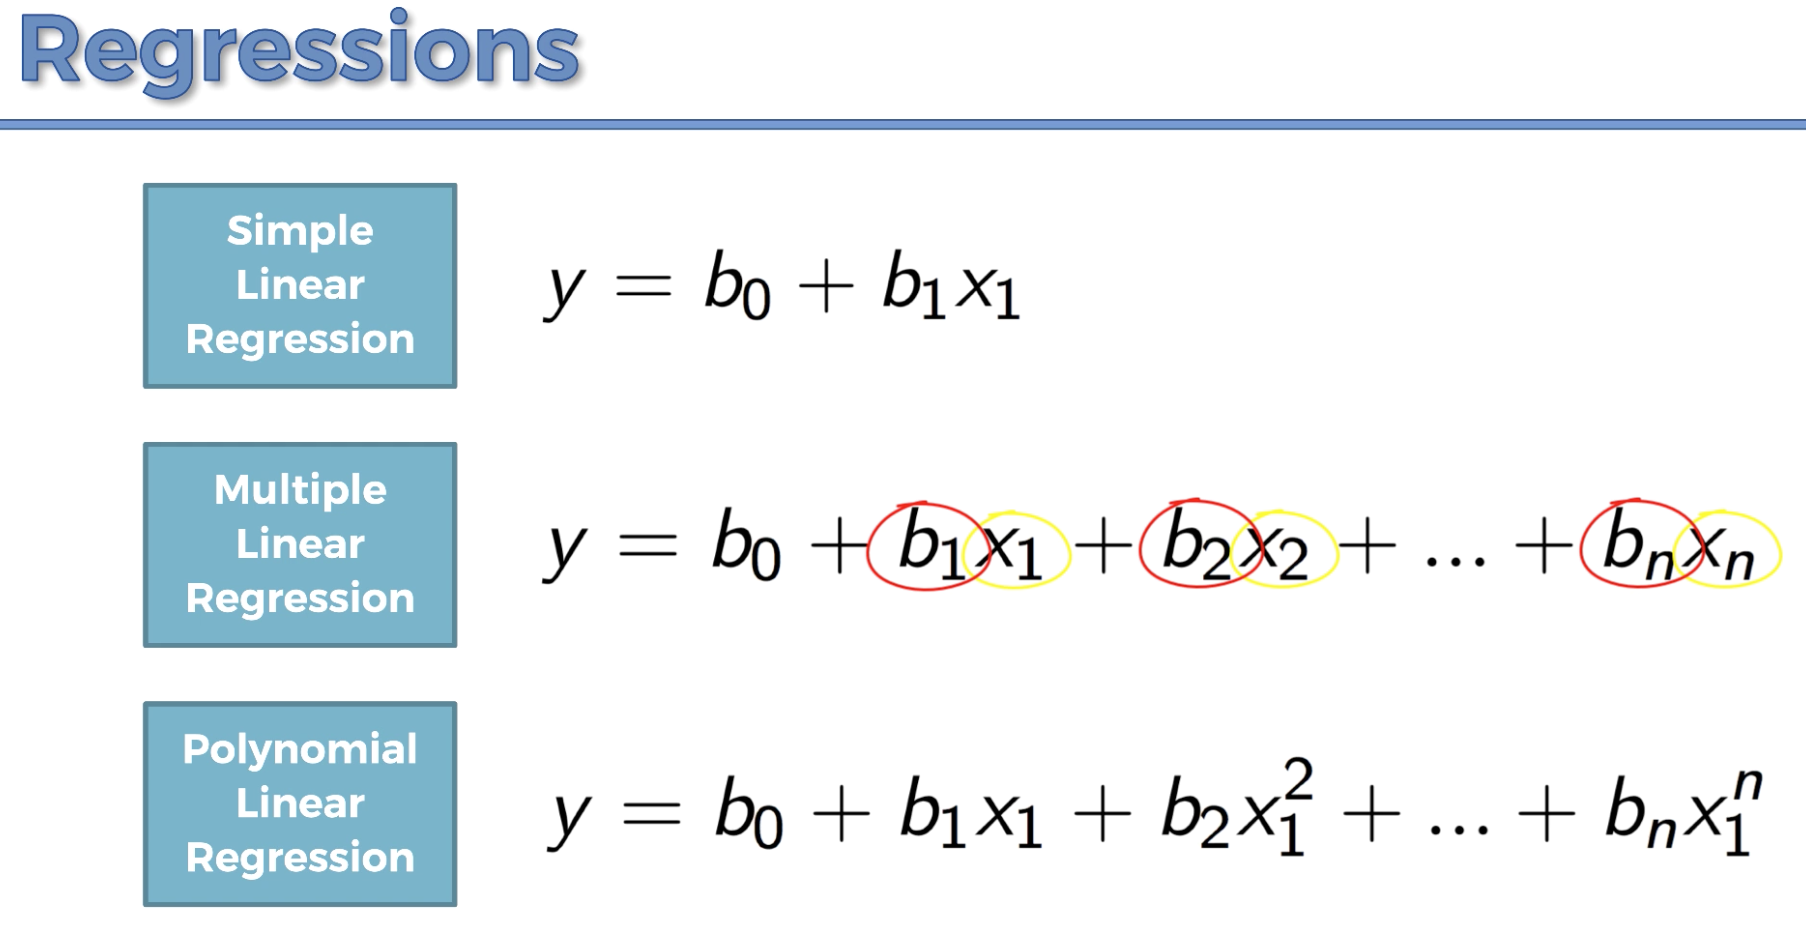

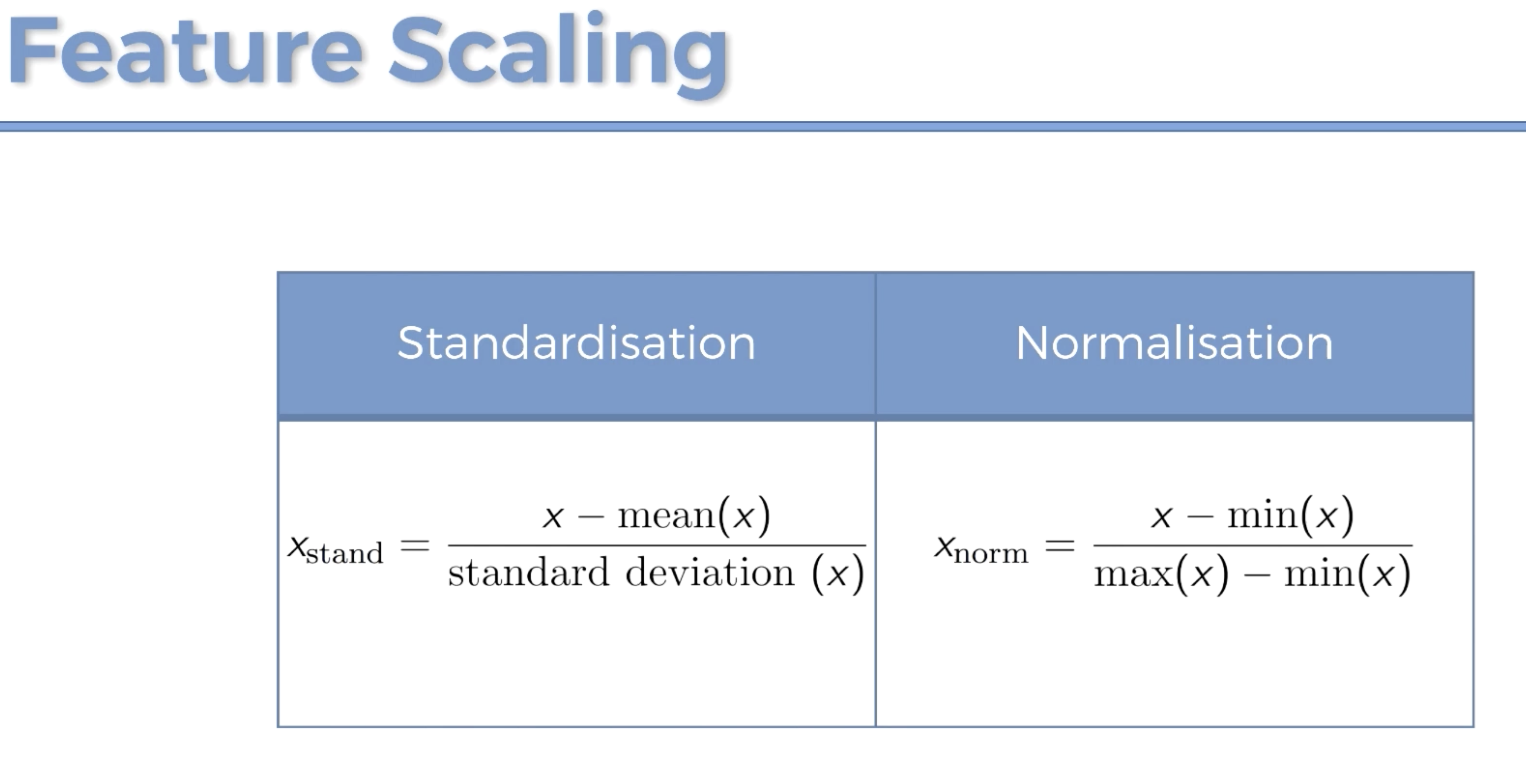

**Standardization:** this will put all the values of the features between around -3 and +3. 

**Normalization:** all the values will end up being between 0 and 1. 

Which should you go for? Normalization is recomended when you have a normal distribution in most of your features. Standardization works well all the time. Therefore, because standardization is a technique that will work all the time and normalization is a technique that is recomended for some specific situations where you have most of your features following a normal distribution, the better thing to do is go for standardizatiton because it will always work. 

Remember that the goal of feature scaling is to have all the values of the features in the same range. Since I told you that standardization transforms your features so that they take values between -3 and +3 and because here our dummy variables already take values between -3 and +3, there is nothing extra to be done here with standardization. Indeed standardization will only make it worse because it will transform these values between -3 and +3 but then you will loose the interpretation of these variables. I.e., you will loose the information of which country corresponds to the observation. If we apply feature scaling to the dummy variables we will get nonsense values and we will be incapable to say which tuple of 3 values here corresponds to which country. This wont even improve the performance of our model because our dummy variables are between the same scale range as your other variables. 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #create an object of the class
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:]) # since this data is new data that we would get in production, with this methid we will only apply the transform method because the features of the test set need to be scaled by the same scalar that was used on the training set. 

In [ ]:
print(X_train)

In [ ]:
print(X_test)

# PART 2: REGRESSION

# Simple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

The goal is to build a simple linear regression model that will be trained to understand the correlations between the number of years of experience and the salary so that it can predict the salary for a new employee. Remember that regression is when you have to predict a continous real value like a salary. Classification is when you have to predict a category. 

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

## Visualising the Training set results

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')# you would get the same exact plot if you plotted x_test instead of x_train
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Remember that the reason we get such a good plot here is simply because there was a linear relationship in the data set between the features and the dependent variable. I want to stress that these beautiful results wont work on all datasets, sometimes you will need a non-linear model. 

# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
X

In [ ]:
y

## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
X

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

At this point we have the model, but it is just not smart yet. We are going to make it smart by training it on our training set composed of X_train and y_train. 

In [ ]:
# Train our multiple linear regression model on our training set
regressor.fit(X_train,y_train)

## Predicting the Test set results

This time we have several features instead of one. Therefore, we cannot actually plot a graph like we did in simple linear regression where we have the IV in the x-axis and the DV in the y-axis. So instead of displaying the test set results on a plot we will display two vectors, the first one is the vectors of the real profit in the test set (ground truth) and another vector of the predicted profits of the same test set. So we can compare for each startup of the test set if our startup is close to the real profit. This is how we will evaluate our model. 

In [ ]:
y_pred = regressor.predict(X_test)

np.set_printoptions(precision=2) #display any numerical value with only two decimals after the comma
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

The dataset does not have perfect linear relationships but you can be assured that this LinearRegression class was able to select the right features and the right parameters to be able to make these predictions. In real life you will run other models too and select the model with the best performance. 

## Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [ ]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

$1, 0, 0, 160000, 130000, 300000 \rightarrow \textrm{scalars}$

$[1, 0, 0, 160000, 130000, 300000] \rightarrow \textrm{1D array}$

$[[1, 0, 0, 160000, 130000, 300000]] \rightarrow \textrm{2D array}$

**Important note 2:** Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

## Getting the final linear regression equation with the values of the coefficients

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

Therefore, the equation of our multiple linear regression model is:

$$\textrm{Profit} = 86.6 \times \textrm{Dummy State 1} - 873 \times \textrm{Dummy State 2} + 786 \times \textrm{Dummy State 3} - 0.773 \times \textrm{R&D Spend} + 0.0329 \times \textrm{Administration} + 0.0366 \times \textrm{Marketing Spend} + 42467.53$$

**Important Note:** To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.

# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Training the Linear Regression model on the whole dataset

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

## Training the Polynomial Regression model on the whole dataset

The polynomial linear regression is not a linear model because you will see it can learn non-linear correlations. But we call it polynomial non-linear regression because there is a linear combination of the squared and powered features. The process of building this model on python will be first to create a matrix of the powered features and then we will create a linear regressor object to integrate these powered features of this matrix of features in this new linear regressor. The final polynomial regressor will be the combination of this matrix of powered features and the linear regressor. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

## Visualising the Linear Regression results

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

You can see that the predictions are not that close to the real result. Now you are going to see that the polynomial regression results will be much better. 

## Visualising the Polynomial Regression results

With higher powers we will get better results.

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg_2.predict(poly_reg.fit_transform(x)),color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

In [ ]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lin_reg_2.predict(poly_reg.fit_transform(x_grid)),color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [ ]:
lin_reg.predict([[6.5]])

## Predicting a new result with Polynomial Regression

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

# Support Vector Regression (SVR)

**Linear SVR**
SVR gives a little bit of buffer to our model since we have the epsilon-insensitive tube.The points that are outside of the tube are dictating what the tube will look like. Remember that the error within the tube is completely disregarded, unlike the ordinary least squares (OLS). Why is this called SVR? Every point is essentially a vector. But the points outside the epsilon-insensitive tube are the support vectors because they are dictating how this tube is created. So they are supporting the formation of the tube. 

The SVR model is great for most of the data sets whether they are linear or non-linear. This is because you get to choose your kernel. 

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# X is a 2D array 
print(X)

In [ ]:
# Y is a 1D vector 
print(y)

We have to reshape y into an 2D array where we have the salaries displayed vertically. Why? Because the Standard Scalar class that will preform feature scaling expects a 2D array as its input. If you input a one dimensional vector this will return an error. 

                    y.reshape(shape, order = 'C')
- we have to enter the new `shape` by inputing two elements. The first one being the number of rows and then the number of columns. We use len(y) because this will get us the number of elements in y (i.e., the number of salaries). `Order` is the number of columns. 

In [ ]:
y = y.reshape(len(y),1)

In [ ]:
print(y)

## Feature Scaling
We have to apply feature scaling because in the SVR model there is not an explicit equation of the dependent variable with respect to the features. Mostly there are not those coefficients multiplying each of the features and therefore not compensating with lower values for the features taking high values. This time the SVR model has an implicit equation of the dependent variable with respect to the features, so we don't have such coefficients. We will definitely have to apply feature scaling for this model. 

We have to scale the dependent variable vector, the salaries. We are not going to use the same standard scalar object on both the matrix of features X and the dependent variable vector y. This is because when you fit your object sc on your data, it is going to compute the mean and standard deviation of that same variable. Therefore since we don't have the same mean and standard deviation for our levels and salaries, then we have to create two standard scalar objects. One that will be fitted to X in order to compute the mean and standard deviation of the position levels and one that will be fitted to y to compute the mean and standard deviation of the salaries. 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
print(X)

In [ ]:
print(y)

## Training the SVR model on the whole dataset
We won't split the whole dataset into a training and a test set because we want to leverage the maximum data to learn these correlations between the position levels and the salaries. 

sklearn is the best library for any machine learning models that are not based on neural networks. Remember that everytime you create a class, the next natural step is to create an object or an instance of this class. 

Everytime you experiment with an SVR model, you should use the RBF kernel. 

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # rbf stands for Gaussian Radial Basis Function
regressor.fit(X, y)

## Predicting a new result
This step will teach you how to reverse the scaling of your prediction. You will see that when we apply the predict method to predict this new result it will be returned in the scale that was used for y, the new scale of y. So we will have to reverse this scaling in order to get the original scale of y. 

inverse_transform will reverse the original scalling to go back to the original scale of y. Remember that any method has to be called on an object. 

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

## Visualising the SVR results


In [ ]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Decision Tree Regression
The decision tree regression model is not well adapted to simple data sets with only one feature and the dependent variable vector. It is better adapted to a high dimensional dataset. 

You don't have to apply feature scaling for decision tree regression because the predictions are resulting from successive splits of the data and therefore there are not resulting from equations like the previous models. Thus no feature scaling is needed to split the different values of your feature. We can still do this with the original scale of your features even if your features take different ranges of values 

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Training the Decision Tree Regression model on the whole dataset
We don't want to split the dataset because we have very little data.

- `DecisionTreeRegressor(random_state = 0)`
    - when you build and train your decision tree regressor there are some random factors happening, so if we don't fix the seed we will get slightly different results in the end. 
 - `regressor.fit(X,y)`
    - this will train your decision tree regressor to understand the correlations between the position levels and the salaries. After which you will have a trained model 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X,y)

## Predicting a new result

In [ ]:
regressor.predict([[6.5]])

## Visualizing the Decision Tree Regression results (higher resolution)

In [ ]:
X_grid = np.arange(min(X), max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color = 'red')
plt.plot(x_grid,regressor.predict(X_grid),color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Random Forest Regression

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=0)
regressor.fit(X,y)

## Predicting a new result

In [ ]:
regressor.predict([[6.5]])

## Visualizing the Random Forest Regression results (higher resolution)
Remember that Random Forest Regression is not really relevant in 2D. Over 3D it is impossible to visualize a regression hyperplane. 

In [ ]:
X_grid = np.arange(min(X), max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color = 'red')
plt.plot(x_grid,regressor.predict(X_grid),color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Logistic Regression

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

In [ ]:
print(y_train)

In [ ]:
print(X_test)

In [ ]:
print(y_test)

## Feature Scaling
Why do we have to apply feature scaling? Feature scaling is not required for logistic regression but applying it will improve the training performance. Therefore it will improve the final predictions. You have to understand that for some models like SVR feature scaling is not an absolute necessity. Whereas for other models, like logistic regression it is not a necessity but applying it will improve the training performance and therefore the final predictions. 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #create an object of the class
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test) # since this data is new data that we would get in production, with this method we will only apply the transform method because the features of the test set need to be scaled by the same scalar that was used on the training set. 

In [ ]:
print(X_train)

In [ ]:
print(X_test)

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

## Predicting a new result
Remember that any single observation inside the predict method has to be input inside a double pair of sqaure brackets. This is because the predict method expects from its input a 2D array. 

We have to scale that single observation because 30 years old and $87,000 as the estimated salary are in the original scale. Since our model was trained on X_train and y_train that were previously feature scaled, the predict method can only be applied to observations where the features have the exact same scale as the one that was used for the training. 

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix
65 means that we have 65 correct predictions of the class 0, meaning the customers that didn't buy the SUV
24 means that we have 24 correct predictions of the class 1, meaning the customer that did buy the SUV
3 means 3 incorrect predictions of the class 1, meaning 3 incorrect predictions who bought the SUV and were predicted not to
8 means 8 incorrect predictions of the class 0, meaning 8 customers who in reality didn't buy the SUV but were predicted to buy to it
0.89 means that we had 89% of correct predictions 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score
ac_s = accuracy_score(y_test,y_pred)
print(ac_s)

## Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## KNN in Python

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #create an object of the class
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test) # since this data is new data that we would get in production, with this method we will only apply the transform method because the features of the test set need to be scaled by the same scalar that was used on the training set. 

## Training the KNN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p=2)
classifier.fit(X_train,y_train)

## Predicting a new result
Remember that any single observation inside the predict method has to be input inside a double pair of sqaure brackets. This is because the predict method expects from its input a 2D array. 

We have to scale that single observation because 30 years old and $87,000 as the estimated salary are in the original scale. Since our model was trained on X_train and y_train that were previously feature scaled, the predict method can only be applied to observations where the features have the exact same scale as the one that was used for the training. 

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score
ac_s = accuracy_score(y_test,y_pred)
print(ac_s)

## Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Support Vector Machine (SVM)

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #create an object of the class
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test) # since this data is new data that we would get in production, with this method we will only apply the transform method because the features of the test set need to be scaled by the same scalar that was used on the training set. 

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train,y_train)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score
ac_s = accuracy_score(y_test,y_pred)
print(ac_s)

## Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Kernel SVM

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #create an object of the class
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test) # since this data is new data that we would get in production, with this method we will only apply the transform method because the features of the test set need to be scaled by the same scalar that was used on the training set. 

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score
ac_s = accuracy_score(y_test,y_pred)
print(ac_s)

## Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Naive Bayes in Python

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #create an object of the class
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test) # since this data is new data that we would get in production, with this method we will only apply the transform method because the features of the test set need to be scaled by the same scalar that was used on the training set. 

## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Decision Tree Classification in Python

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #create an object of the class
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test) # since this data is new data that we would get in production, with this method we will only apply the transform method because the features of the test set need to be scaled by the same scalar that was used on the training set. 

## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion ='entropy',random_state = 0)
classifier.fit(X_train,y_train)

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Random Forest Classification

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #create an object of the class
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test) # since this data is new data that we would get in production, with this method we will only apply the transform method because the features of the test set need to be scaled by the same scalar that was used on the training set. 

## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[30,87000]])))

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 10, stop = X_set[:,0].max()+10,step = 0.25),
                    np.arange(start = X_set[:,1].min() - 1000, stop = X_set[:,1].max() + 1000, step = 0.25))

plt.contourf(X1,X2, classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
           alpha = 0.75, cmap = ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green'))(i),label = j)
    
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Choosing a Model 
Which classification model should I select for my dataset? 

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset
Remember that this code works for any dataset regardless of the number of features as long as you have the dependent variable as the last column of the dataset and the features as all other columns. 

In [ ]:
dataset = pd.read_csv('Data_bio.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
dataset.head()

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Training the K-NN model on the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,metric ='minkowski',p=2)
classifier.fit(X_train,y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train,y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel= 'rbf',random_state=0)
classifier.fit(X_train,y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Training the Naive Bayes model on the Training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion = 'entropy',random_state = 0)
classifier.fit(X_train,y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## K - Means Clustering

We will create a dependent variable that will take a finite number of values and each of the values will be a class of this DV we are going to create. This is exactly what clustering means. If you want to be broad in explaining what k-means clustering is you would say that we are identifying patterns in data. But if you want to clearly explain how to identify these patterns in the data, you would say that we are building a DV in such a way that each of the values of this future DV we are creating are actually the classes of this DV. 

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

Remember that there is not a dependent variable apriori when doing clustering. Spending score is not the DV, but rather it is a feature that we will use to identify patterns in the data. The patterns are clusters in the data that will be gathered by similarity. 

We are only going to use the two features annual income and spending score just for teaching purposes. This is because we want to visualize the results, so we need a 2D plot. 

We don't have to split the data into a training and test set, because doing so implies having a dependent variable vector. 

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values

In [ ]:
dataset.head()

## Using the elbow method to find the optimal number of clusters 
The way we will implement the elbow method will be by running the k-means algoritm with several number of clusters. 

In [ ]:
from sklearn.cluster import KMeans

# initialize an empty list which will be populated with the WCSS values
wcss = []

# create a for loop that will run the KMeans algorithm with 10 different numbers of clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia is an attribute that will give us the wcss value

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset
Remember that we want to build that DV of which the values are exactly these clusters from 1-5. Each of these clusters will be a certain group of customers. 

`fit_predict` method not only trains your k-means model on the dataset, but also it returns that DV that we are about to create. 

In [ ]:
kmeans = KMeans(n_clusters = 5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

## Visualizing the clusters

In [ ]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],c='red',s=100,label = 'Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],c='blue',s=100,label = 'Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],c='green',s=100,label = 'Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],c='cyan',s=100,label = 'Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],c='magenta',s=100,label = 'Cluster 5')

# plot centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300, c= 'yellow',label='Centroids')# 0 corresponds to the x coordinate of these cluster centers, 1 to the y coordinate

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Heirarchical Clustering

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values

## Using the dendogram to find the optimal number of clusters
In heirchical clustering the most relevant method is the method of minimum variance which is a technique that will result in having clusters inside which the observation points don't vary that much. This is called ward. 

On a dendrogram, the optimal number of clusters can be found where you have you have the largest distance you can move vertically without touching one of these horizontal bars. 

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Heirarchical Clustering model on the dataset
Affinity is the type of distance that will be computed in order to measure the variance within your clusters. Remember that the ward method corresponds to the minimum variance method. 

Remember that we want to create a DV that contains for each customer the future cluster they will belong to and therefore instead of only using the fit method which usually trains your machine learning models on your dataset, we are going to use the fit predict method which will not only train your heirchical clustering model on your dataset but will also create a DV containing the clusters they belong to. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

## Visualizing the clusters

In [ ]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],c='red',s=100,label = 'Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],c='blue',s=100,label = 'Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],c='green',s=100,label = 'Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],c='cyan',s=100,label = 'Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],c='magenta',s=100,label = 'Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Apriori in Python

## Importing the libraries 

In [ ]:
# !pip install apyori

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

When we train the apriori model on the datset we will use a certain function that is called apriori and that function will take the dataset. But the thing is that it expects this dataset to have a certain format that is not a pandas dataframe, instead it is a list of transactions. 

Note that all the elements in the list must be strings otherwise the apriori model wont be able to learn the rules. 

In [ ]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
dataset.head()

In [ ]:
transactions = []
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

## Training the Apriori model on the dataset
- `transactions` - the appriori model is mostly used to compute some correlations and association rules among transactitons which is why this is the name of the parameter. The value for that parameter should be the transactions list which we created. 
- `min_support` - used in order not to compute all the rules, but only compute the rules that have some certain relevance. We have 7501 transactions that were recorded over one week. Among these 7501 transactions we want to get the most relevant rules. Remember that the support of a couple of products A and B is the number of transactions containing these products A and B divided by the total number of transactions. Lets use some common sense and say that each day we would like to consider the products that appear in at least 3 transactions in a day. Because all the products that appear in 1 or two transactions a day are not frequent. Our common sense here is to only consider the products that appear three times a day. Since the 7501 transactions were recorded during the whole week, we need to multiply this number of 3 transactions per day by 7 in order to get that minimum number of times we want to see these products in the transactions. Since the support is the number of times the products appear in the transactions divided by the total number of transactions, the minimum support must be (3*7)/7501. 
- `min_confidence` - there is no rule of thumb here, you can try different values depending on your business requirements. E.g., min_confidence of 0.8 would require the rule to be correct 80% of the time.
- `min_lift` - generally a good lift is at least 3. Lifts below 3 make the rules not that relevant. 
- `min_length` - the minimum number of elements you want to have in your rule.  
- `max_length` - the maximum number of elements you want to have in your rule. 
We set both `min_length` and `max_length` to 2 because in our business problem we want to find the best deals of buying one product and getting another one for free. Therefore our rules must have exactly two elements. 

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = (3*7)/7501, min_confidence = 0.2, min_lift = 3,min_length=2, max_length = 2)

## Visualizing the results

## Displaying the first results coming directly from the output apriori function

In [ ]:
results = list(rules)
print(results)

Lets break the rules down: 

```python
RelationRecord(items=frozenset({'chicken', 'extra dark chocolate'}), support=0.0027996267164378083, ordered_statistics=[OrderedStatistic(items_base=frozenset({'extra dark chocolate'}), items_add=frozenset({'chicken'}), confidence=0.23333333333333334, lift=3.8894074074074076)])```

The two products in this rule are chicken and extra dark chocolate. items_base = extra dark chocolate and items_add = chicken means that if people buy extra dark chocolate then they will have a high chance to buy chicken. That high chance is measured by the confidence which is 0.2333 here. 

## Putting the results into a well organized Pandas DataFrame

In [ ]:
def inspect(results): 
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs,rhs,supports,confidences,lifts))
    
resultsinDataFrame = pd.DataFrame(inspect(results),columns = ['Left Hand Side', 'Right Hand Side', 'Support',
                                                             'Confidence','Lift'])

## Displaying the results non sorted

In [ ]:
resultsinDataFrame

## Displaying the results sorted by descending lifts

In [ ]:
resultsinDataFrame.nlargest(n = 10, columns = 'Lift')

## Eclat

## Importing the libraries

In [ ]:
# !pip install apyori

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset 

In [ ]:
dataset = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
dataset.head()

In [ ]:
transactions = []
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

## Training the Eclat model on the dataset
You could remove the min_confidence and min_lift in order to only consider the min_support, but I recomend that you keep them because these two will give you even stronger associations. 

In [ ]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = (3*7)/7501,min_confidence = 0.2, min_lift = 3,min_length = 2, max_length = 2)

## Visualizing the results

## Displaying the first results coming directly from the output apriori function

In [ ]:
results = list(rules)
print(results)

## Putting the results into a well organized Pandas DataFrame

In [ ]:
def inspect(results): 
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    return list(zip(lhs,rhs,supports))
    
resultsinDataFrame = pd.DataFrame(inspect(results),columns = ['Product 1', 'Product 2', 'Support'])

## Displaying the results non sorted

In [ ]:
resultsinDataFrame

## Displaying the results sorted by descending supports

In [ ]:
resultsinDataFrame.nlargest(n = 10, columns = 'Support')

It is better that you work with the apriori model because these extra metrics such as the confidence and the lift will give you much stronger results in the end. 

## Upper Confidence Bound (UCB)

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset
Each row corresponds to the different users connecting to the weboage, and each column corresponds to the different ads. This dataset is a simulation in the sense that each time a user connects to the web page, this dataset tells us (even if we wouldn't know in reality) on which add the user would click on. We wouldn't know this in reality. 

We have 10,000 users and we are going to run the UCB algorithm to figure out the add that has the highest click through rate. 

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math 
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0]*d # initialize a list of 10 zeros
sums_of_rewards = [0]*d
total_reward = 0

# create a loop that will iterate through all the rounds 
for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else: 
            upper_bound = 1e400 # a random super high value that will definitely be the maximum of the upper bound
        
        if upper_bound > max_upper_bound: 
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    numbers_of_selections[ad]+=1
    reward = dataset.values[n,ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

## Visualizing the results

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Thompson Sampling

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling 

In [ ]:
import random 
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0]*d # create a list of 10 0's
numbers_of_rewards_0 = [0]*d
total_reward = 0

for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(numbers_of_rewards_1[i]+1,numbers_of_rewards_0[i]+1)
        if random_beta > max_random: 
            max_random = random_beta
            ad = i
            
    ads_selected.append(ad)
    reward = dataset.values[n,ad]
    if reward == 1:
        numbers_of_rewards_1[ad] +=1
    else: 
        numbers_of_rewards_0[ad] +=1
    total_reward += reward

## Visualizing the results

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Natural Language Processing

## Importing the libraries 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset
- `quoting` - we are using this because our data has many double quotes. In order to process this the right way, we will have to tell our model to ignore the double quotes. When you set the parameter to 3 that means to ignore the quotes. 

In [ ]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',sep='\t',quoting = 3)

In [ ]:
dataset.head()

## Cleaning the texts
- `nltk` will allow us to download the ensemble of stop words. These are words that we don't want to include in our reviews because they are not relevant to help the predictions of whether a review is positive or negative. These words include articles (e.g., the, and,...). 
- stemming consists of only taking the root of a word that indicates enough about what this word means. Lets say we want to apply stemming to the word "loved" what stemming will do is transform the word "loved" into "love". We can remove all the conjucations to simplify the reviews. Remember that when creating the bag of words model, we will create a sparse matrix. Therefore in order to optimize/minimize the dimension of this sparse matrix we need to simplify the words as much as we can. If we don't apply stemming then we will have two seperate columns, one for love and another for loved. Since that means the same thing, that would be redundant and would make the sparse matrix even more complex. This is exactly what stemming is about. It consists of reducing the final dimension of the sparse matrix so that we can not have too much trouble to learn the text from our ML model. 

We are going to make a for loop to iterate through all the different reviews of our dataset and for each of these reviews we will apply a cleaning process (putting all the letters in lower case, removing all the punctuations, removing stop words, etc.). We will do that one review at a time and each time we clean a review, we will add it to this corpus. 

- re.sub() is a function that can remove a string with anything else. We are going to replace any character that is not a letter by a space so that every punctuation will be replaced by a space. the `^` means not. Meaning not all the letters from a-z nor the capital letters from A-Z. 

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = [] # will contain all our different reviews from the dataset, but all cleaned 

for i in range(0,len(dataset)):
    review = re.sub('[^a-zA-z]',' ',dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    # Apply stemming to all the words except stop words 
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    # Format review as a string
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
print(corpus)

## Creating the Bag of Words model
CountVectorizer() takes as input only one important parameter, which is the maximum size of the sparse matrix. Therefore, the maximum number of words you want to include in the sparse matrix. We still have many words that even if they are not apart of the stop words don't help at all to predict whether a review is positive or negative. The way to get rid of them is to take the most frequent words. For example, the word "steve" probably only occurs once. So if we only take the most frequent words we will ignore this. Be careful not to remove too many words. 

- `cv.fit_transform(corpus)` will take all the words from all the reviews in the corpus and we will put all these words in different columns. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [ ]:
# num of columns/words 
len(X[0])

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Training the Naive Bayes Model on the Training Set

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

# ANN in Python

ANN can be used for both regression and classification

## Importing the libraries 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
tf.__version__

## Part 1 - Data Preprocessing

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

## Encoding categorical data 

In [ ]:
# Label Encoding the "Gender" column 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [ ]:
print(X)

In [ ]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

## Feature Scaling
Feature scaling is always necessary for deep learning. Whenever you build an artificial neural network you have to apply feature scaling. It is so fundamental that we will apply feature scaling to all out features regardless of whether they have values like 0 and 1 (like the dummy variables). We will just scale everything because it is so important to do it for deep learning.  

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Apply feature scaling to all the features of the training and test set
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

## Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer
The way to add a fully connected layer into an artificial neural network is to use the dense class. 
- units - corresponds to the number of neurons you want to have in the first hidden layer. How do we know how many neurons we want? There is no rule of thumb, it is based on experimentation. 
- activation - the activation function in the hidden layers of a fully connected neural network must be the rectifier activation function. relu is the code name for the rectifier activation function. 

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

## Adding the second hidden layer
The way to add the second hidden layer is the same as adding the first hidden layer. 

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

## Adding the output layer
The output layer contains the dimensions of the output that you want to predict. Here since we want to predict a binary variable which can take the value 1 or 0, the dimension is 1. This is because we only need 1 neuron to get that prediction of 0 or 1. However, if we were doing classification with a non-binary DV (e.g., like a DV that has three classes, lets say ABC), we would need 3 dimensions/3 output neurons to one-hot encode that DV because there is no relationship order between the classes ABC. A would have to be encoded by [1,0,0]. B would have to be encoded by [0,1,0]. C would have to be encoded by [0,0,1]. Therefore you need three neurons to encode your three classes A,B,C. 

For the activation function of the output layer, you don't want to have a rectifier activation function but a sigmoid activation function. This is because having a sigmoid activation function allows us to not only get the predictions, but it will give you the probabilities that the binary outcome is 1. 

In [ ]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Part 3 - Training the ANN

## Compiling the ANN

- loss - when you are doing binary classification, the loss function should always be 'binary_crossentropy'. If you were doing non-binary classification you would have to enter 'categorical_crossentropy' as the loss. 

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set
The classic batch size is 32. Feel free to choose any number of epochs as long as it is not too small because your neural network needs a certain amount of epochs in order to learn properly. 

In [ ]:
ann.fit(X_train,y_train,batch_size=32,epochs=100)

## Predicting the result of a single observation

Use your ANN model to predict if the customer with the following information will leave the bank: 

- Geography: France
- Credit score: 600
- Gender: Male
- Age: 40 years old 
- Tenure: 3 years
- Balance: 60000K
- Number of products: 2
- Does this customer have a credit card? Yes
- Is this customer an Active Member? Yes
- Estimated salary: 50000K

It is very important to remember that any input of the predict method must be a 2D array.  

Remember that the predict method should be called on the observations onto which the same scaling was applied as in the training. Since we trained our artificial neural network with the scaled values of the features, the predict method has to be called onto these observations to which the same scaling was applied. 

In [ ]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])))

If you don't want the outcome in terms of a probability, the trick to convert this into the final prediction you just need to add > 0.5 before the outer parenthesis. Of course you can choose different values for the threshold.

In [ ]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)

Therefore, out ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input into a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. 

**Important note 2:** Notice that the "France" country was not input as a string but as "1,0,0" in the first three columns. That's because the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1,0,0". Be careful to include these values in the first three columns, because dummy variables are always created in the first columns. 

## Predicting the Test set results

In [ ]:
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.5
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

## Convolutional Neural Network (CNN)

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

### Part 1 - Data Preprocesing

#### Preprocessing the Training set
The reason why we want to apply transformations on the images of the training set is to avoid over-fitting. If we don't apply these transformations when training our CNN on the training set we will get a huge difference between the accuracy on the training set and the one on the test set. We will get very high accuracies on the training set and much lower accuracies on the test set. This is called overfitting. What are these transformations? They are geometrical transformations (e.g., shift pixels, rotate images, horizontal flips, zoom in/zoom out). The technical term for this is called image augmentation. 

train_datagen is an instance of that ImageDataGenerator class which represents the tool that will apply all the transformations on the images of the training set. 
- rescale will apply feature scaling to each of your pixels by dividing their value by 255. Remember that each pixel takes a value between 0 and 255, so by dividing all of them by 255 we get all the pixel values between 0 and 1. This is just like normalization. 

- batch size is how many images we want to have in each batch. 32 is the classic default value. 

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

# connect train_datagen to our dataset
training_set = train_datagen.flow_from_directory('cnn_dataset/training_set',
                                                 target_size=(64,64),
                                                 batch_size=32, 
                                                 class_mode = 'binary')

#### Preprocessing the Test set
We are not going to apply the same transformations to our test data. However, we do have to rescale their pixels. 

We need to have the same target size. 

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory('cnn_dataset/test_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary')

### Part 2 - Building the CNN

#### Initializing the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

#### Step 1 - Convolution
When you add your first layer, you have to specify the input shape of your inputs. Here, since we are working with colored images the input_shape would be (64,64,3).  

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,
                               kernel_size = 3,
                               activation = 'relu',
                               input_shape = [64,64,3]))

#### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                  strides = 2))

#### Adding a second convolutional layer
We are going to remove the input_shape parameter because this is entered only when you add your very first layer. 

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters = 32,
                               kernel_size = 3,
                               activation = 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2,
                                  strides = 2))

#### Step 3 - Flattening 

In [ ]:
cnn.add(tf.keras.layers.Flatten())

#### Step 4 - Full Connection
- units is the number of hidden neurons you want to have. 

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 128, 
                              activation = 'relu'))

#### Step 5 - Output Layer
- because we are doing binary classification we only need 1 neuron to encode that binary class 0 or 1. 
- for the output layer it is recomended to have a sigmoid activation function. This is because we are doing binary classification. If we were doing multiclass classification we would have a soft max activation function. 

In [ ]:
cnn.add(tf.keras.layers.Dense(units = 1, 
                              activation = 'sigmoid'))

### Part 3 - Training the CNN

#### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Test set
The 250 corresponds to the fact that the batch size is 32 and we have in total 8,000 images. So that 32 * 250 = 8,000. So basically we have 32 images in a batch and we have 250 steps in each epoch to reach the total amount of 8,000 images.  

In [ ]:
cnn.fit(x = training_set,
        validation_data = test_set,
        epochs = 25)

### Part 4 - Making a single prediction
The input image has to have the same size as the one that was used during the training. 

Remember that the predict method expects as its input a 2D array. Even if now we are about to deploy our model on a single image, that single image still has to be a batch so that the predict method of the CNN model can recognize the batch as that extra dimension. 

We set axis = 0 so that the dimension of the batch that we are adding to our image will be the first dimension. 

The way to figure out what 0/1 stand for (cat or dog) is to call the class indices attribute from our training set object. 

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('cnn_dataset/single_prediction/cat_or_dog_1.jpg',
                           target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

training_set.class_indices

if result[0][0] == 1: 
    prediction = 'dog'
else: 
    prediction = 'cat'

In [ ]:
print(prediction)

In [ ]:
test_image = image.load_img('cnn_dataset/single_prediction/cat_or_dog_2.jpg',
                           target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

training_set.class_indices

if result[0][0] == 1: 
    prediction = 'dog'
else: 
    prediction = 'cat'

In [ ]:
print(prediction)

# Principal Component Analysis (PCA)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Applying PCA
How do we know down to how many extracted features we want to reduce the dimensionality of our dataset. Try starting with 2. We want to start with 2 because if we get good results then we will be able to visualize the results. Remember that PCA is about extracting somem features that explain well enough the variance. Once you find them you will get good results even with lower dimensionality. 

As long as you apply some transformations like datapreprocessing or dimensionality reduction on your training set, you have to do the same on your test set. However be careful, we will have to apply the fit transform method on the training set but only the transform method on the test set. This is because we want to avoid information leakage on the test set. The test set is supposed to be new observations so we are not supposed to fit our feature extracter object on the test set. 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

### Training the Logistic Regression model on the Training set
Feel free to choose another classification model. Notice that it is important to apply PCA before training your classification model on the training set. 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

### Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green','blue'))(i),label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green','blue'))(i),label = j)
    
plt.title('Logistic Regression (Testing set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Linear Discriminant Analysis (LDA)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Applying LDA
With PCA the fit_transform method took only X_train as input because it only needed the features to apply this PCA dimensionality reduction technique. But LDA is different. In order to apply the technique, it needs not only the features but also the dependent variable. Take away: for PCA you only have to input X_train, while for LDA you have to input both the features X_train and the dependent variable y_train. 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

### Training the Logistic Regression model on the Training set
Feel free to choose another classification model. Notice that it is important to apply PCA before training your classification model on the training set. 

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

### Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green','blue'))(i),label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

### Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green','blue'))(i),label = j)
    
plt.title('Logistic Regression (Testing set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Kernel PCA

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Applying Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

### Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

### Visualizing the Training set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green','blue'))(i),label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()

### Visualizing the Test set results

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max()+1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0],X_set[y_set == j,1], c = ListedColormap(('red','green','blue'))(i),label = j)
    
plt.title('Logistic Regression (Testing set)')
plt.xlabel('KPC1')
plt.ylabel('KPC2')
plt.legend()
plt.show()

# K-Fold Cross Validation

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier,
                             X = X_train, 
                             y = y_train, 
                             cv = 10) 
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation: {:.2f}%".format(accuracies.std()*100))

# Grid Search

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Training the Kernel SVM model on the Training set

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

## Making the Confusion Matrix

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Applying k-Fold Cross Validation

In [7]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier,
                             X = X_train, 
                             y = y_train, 
                             cv = 10) 
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy: 90.05%
Standard deviation: 6.39%


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/

## Applying Grid Search to find the best model and the best parameters

In [8]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C':[0.25,0.5,0.75,1],'kernel': ['linear']},
              {'C':[0.25,0.5,0.75,1],'kernel': ['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f}%".format(best_accuracy*100))
print("Best Parameters:",best_parameters)

Best Accuracy: 90.67%
Best Parameters: {'C': 0.75, 'gamma': 0.8, 'kernel': 'rbf'}


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
